In [49]:
from read_graph import read_ID_map, read_link_graph

TITLES_TO_IDS, IDS_TO_TILES = read_ID_map("data/ID_map.txt")
GRAPH = read_link_graph("data/link_graph_ids.txt")

Reading Graph: 100%|██████████| 16833643/16833643 [00:43<00:00, 385763.10it/s]


In [50]:
from helpers import build_transpose_graph
TRANSPOSE_GRAPH = build_transpose_graph(GRAPH)

Building Transpose Graph: 100%|██████████| 16714619/16714619 [01:22<00:00, 202462.01it/s]


In [70]:
import importlib

import search
importlib.reload(search)

search.GRAPH = GRAPH
search.TRANSPOSE_GRAPH = TRANSPOSE_GRAPH
search.TITLES_TO_IDS = TITLES_TO_IDS
search.IDS_TO_TILES = IDS_TO_TILES

In [71]:
landmarks = [
    # TITLES_TO_IDS["United_States"],
    TITLES_TO_IDS["John_Cena"],
]
search.compute_landmark_distances(landmarks)

Computing distances from landmark: John_Cena
depth: 0 (John_Cena)
depth: 1 (Anime)
depth: 2 (Animation)
1000000
depth: 3 (Czechoslovakia)
2000000
3000000
4000000
5000000
depth: 4 (Slovak_state)
6000000
7000000
8000000
depth: 5 (Zbrojovka_Z_5_Express)
9000000
depth: 6 (Zbrojovka_Disk)
depth: 7 (Eva_Kováčová)
depth: 8 (Stewart_Adam_Thomson_Mallin)
depth: 9 (William_Robert_Baxter)
depth: 10 (Allan_Baxter)
depth: 11 (Justice_Baxter)
depth: 12 (Capt._Sylvester_Baxter_House)
depth: 13 (Monterrey_La_Raza)
depth: 14 (Rassa)
depth: 15 (Raška_(disambiguation))
depth: 16 (Raška)
depth: 17 (Raska_(disambiguation))
depth: 18 (Raska)
depth: 19 (Raska_(region))
depth: 20 (1996_Guangzhou_Apollo_F.C._season)
depth: 21 (1995_Guangzhou_Apollo_F.C._season)
depth: 22 (Isamu_Tsuji)
depth: 23 (Zhao_Lin_(footballer))
depth: 24 (List_of_peers_1500–1509)
depth: 25 (List_of_peers_1510–1519)
depth: 26 (List_of_peers_1520–1529)
depth: 27 (Baron_Marny)
depth: 28 (Anne_Boleyn,_1st_Marchioness_of_Pembroke)
depth: 29 

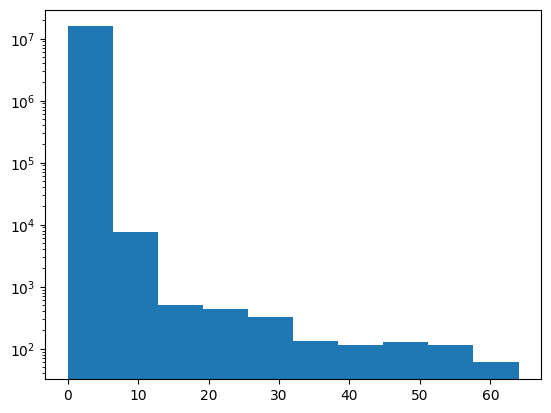

In [79]:
import matplotlib.pyplot as plt

plt.hist(search.TO_LANDMARK_DISTANCES[landmarks[0]].values())
plt.gca().set_yscale("log")

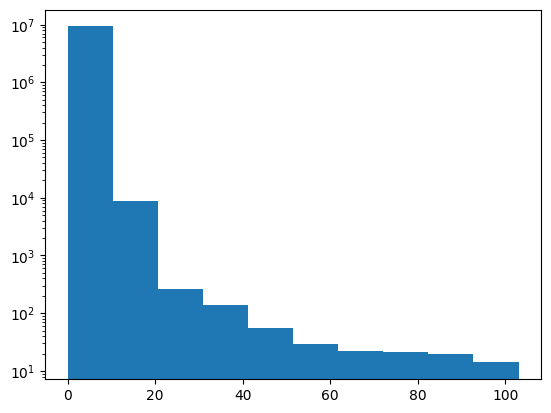

In [80]:
plt.hist(search.FROM_LANDMARK_DISTANCES[landmarks[0]].values())
plt.gca().set_yscale("log")

In [90]:
search.landmarks_heuristic(
    TITLES_TO_IDS["Babe_Ruth"],
    TITLES_TO_IDS["Coastal_California"],
    TITLES_TO_IDS["Andrew_Carnegie"]
)

0

In [91]:
search.FROM_LANDMARK_DISTANCES[landmarks[0]][TITLES_TO_IDS["Baseball"]]

2

In [76]:
import timeit

def test(start, goal):
    print("Dummy Heuristic")
    start_time = timeit.default_timer()
    path = search.shortest_path(start, goal, method="A* dummy")
    stop_time = timeit.default_timer()
    print()
    print(f"({(stop_time-start_time)*1000:.0f} ms)")

    print("Path:  ", "  ->  ".join(path))
    print()

    print("Landmarks Heuristic")
    start_time = timeit.default_timer()
    path = search.shortest_path(start, goal, method="A* landmarks")
    stop_time = timeit.default_timer()
    print()
    print(f"({(stop_time-start_time)*1000:.0f} ms)")

    print("Path:  ", "  ->  ".join(path))
    print()

In [77]:
test("Babe_Ruth", "Coastal_California")

Dummy Heuristic

(7360 ms)
Path:   Babe_Ruth  ->  The_New_York_Times  ->  California  ->  Coastal_California

Landmarks Heuristic

(10661 ms)
Path:   Babe_Ruth  ->  The_New_York_Times  ->  California  ->  Coastal_California

